#  Goal

- Describing the data set (universe, RV functions, DVS)
- Missing values
- Visualize the data set
- Identify any interesting structure in the data set (outliers, skewness)
- Correlational information and it's interpretation
- Graphical displays of 2-dimensional continuous distributions of pairs
  of relevant variables or features extracted
- Clusters (obtained with Dimensionality Reduction)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import norm

#Library for Dimensionality Reduction
from sklearn.manifold import TSNE

import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("D:\DE_Jacobs University\Spring 2020\Principles of Statistical Modeling\Final Project\Data\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Number of missing values in each column of dataframe
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


no missing values from this data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.shape

(284807, 31)

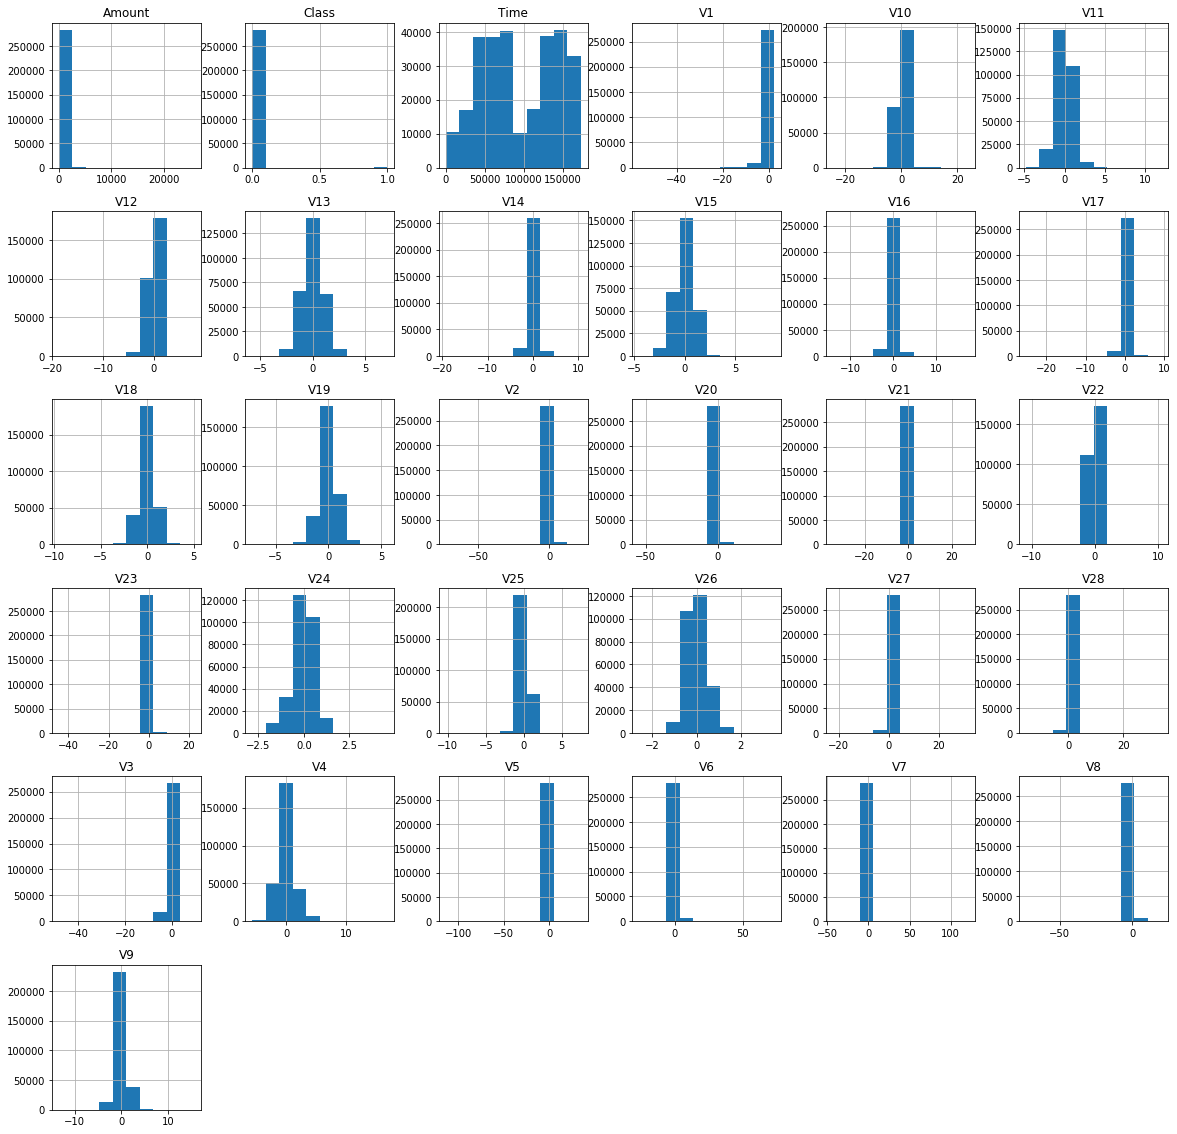

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [9]:
df.kurtosis()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

### Data value spaces of the RV functions

In [10]:
def minVal(x):
    return pd.Series(index=['min','idx'],data=[x.min(),x.idxmin()])

x = df.apply(minVal)

print(x.T)

               min       idx
Time      0.000000       0.0
V1      -56.407510   39769.0
V2      -72.715728   39769.0
V3      -48.325589  274771.0
V4       -5.683171  180814.0
V5     -113.743307  274771.0
V6      -26.160506   39769.0
V7      -43.557242  154684.0
V8      -73.216718   65423.0
V9      -13.434066  154587.0
V10     -24.588262  154684.0
V11      -4.797473  174293.0
V12     -18.683715  150644.0
V13      -5.791881   65423.0
V14     -19.214325    8296.0
V15      -4.498945  154371.0
V16     -14.129855  150684.0
V17     -25.162799   42473.0
V18      -9.498746   42856.0
V19      -7.213527   58465.0
V20     -54.497720  274771.0
V21     -34.830382   65423.0
V22     -10.933144   58465.0
V23     -44.807735   91896.0
V24      -2.836627   21508.0
V25     -10.295397   91896.0
V26      -2.604551  151296.0
V27     -22.565679  118764.0
V28     -15.430084  274771.0
Amount    0.000000     383.0
Class     0.000000       0.0


In [11]:
def maxVal(x):
    return pd.Series(index=['max','idx'],data=[x.max(),x.idxmax()])

x = df.apply(maxVal)

print(x.T)

                  max       idx
Time    172792.000000  284806.0
V1           2.454930  193547.0
V2          22.057729  154684.0
V3           9.382558  118764.0
V4          16.875344  151296.0
V5          34.801666   39769.0
V6          73.301626  274771.0
V7         120.589494  274771.0
V8          20.007208   17480.0
V9          15.594995  118764.0
V10         23.745136  118764.0
V11         12.018913    8296.0
V12          7.848392   65423.0
V13          7.126883  274771.0
V14         10.526766   65423.0
V15          8.877742  274771.0
V16         17.315112  274771.0
V17          9.253526   10900.0
V18          5.041069   58465.0
V19          5.591971  189242.0
V20         39.420904   58465.0
V21         27.202839  102441.0
V22         10.503090   65423.0
V23         22.528412  228723.0
V24          4.584549  274771.0
V25          7.519589  145022.0
V26          3.517346    6057.0
V27         31.612198  274771.0
V28         33.847808   39769.0
Amount   25691.160000  274771.0
Class   

### Scaling the RV-functions "Time" and "Amount"
- note that all other RV-functions have been scaled because of the PCA transformation,except RV-functions Time and Amount
- RobustScaler is used here because it is less prone to outliers (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [12]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = df['amount']
scaled_time = df['time']

df.drop(['amount', 'time'], axis=1, inplace=True)
df.insert(0, 'amount', scaled_amount)
df.insert(1, 'time', scaled_time)

#here RV-functions Time and Amount are scaled

df.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### since Class is highly skewed, make the classes equivalent in order to have a normal distribution of the RV-function Class

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
# shuffle the data before creating the subset

df = df.sample(frac=1)

# the amount of fraud classes is 492
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
# new_df is the new random subset data created

new_df.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
219266,0.243834,0.669275,-0.389520,0.620121,-0.252943,-1.392988,0.855495,-0.584210,1.279028,-0.195217,...,-0.482670,0.146150,0.555825,-0.014413,-0.495461,-0.787372,-0.714986,0.004258,0.217227,0
247673,3.156012,0.810172,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,...,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1
178419,-0.167680,0.457289,2.059169,-0.651812,-0.312115,0.715305,-0.995525,-0.416284,-0.830450,-0.085232,...,-0.661308,-0.006768,0.689477,0.095910,-0.036212,0.008312,-0.372081,0.081350,-0.031659,0
6529,-0.293440,-0.902278,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,...,0.315957,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1
215953,-0.296653,0.653215,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,-1.819539,...,-0.381444,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,1


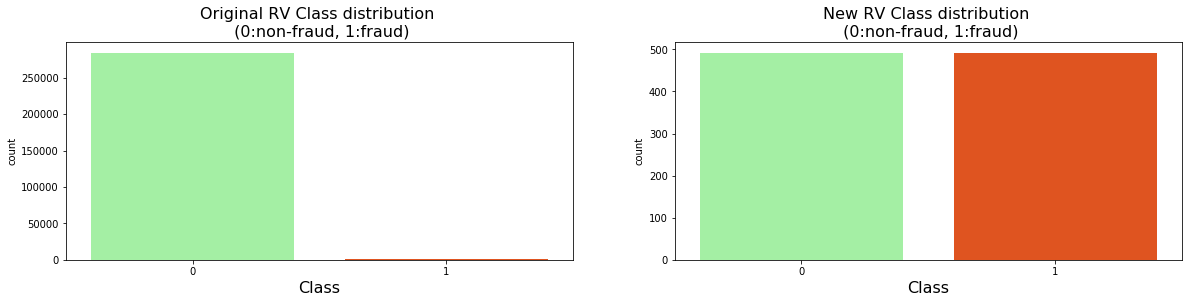

In [16]:
f, dist_ax = plt.subplots(ncols=2, figsize=(20,4))

colors = ["palegreen", "orangered"]

sns.countplot('Class', data=df, palette=colors, ax=dist_ax[0])
ax=dist_ax[0].set_title('Original RV Class distribution \n (0:non-fraud, 1:fraud)', fontsize=16)
dist_ax[0].set_xlabel('Class', color='k', fontsize=16)

sns.countplot('Class', data=new_df, palette=colors, ax=dist_ax[1])
ax=dist_ax[1].set_title('New RV Class distribution \n (0:non-fraud, 1:fraud)', fontsize=16)
dist_ax[1].set_xlabel('Class', color='k', fontsize=16)


plt.show()

### Correlation matrix using the subset

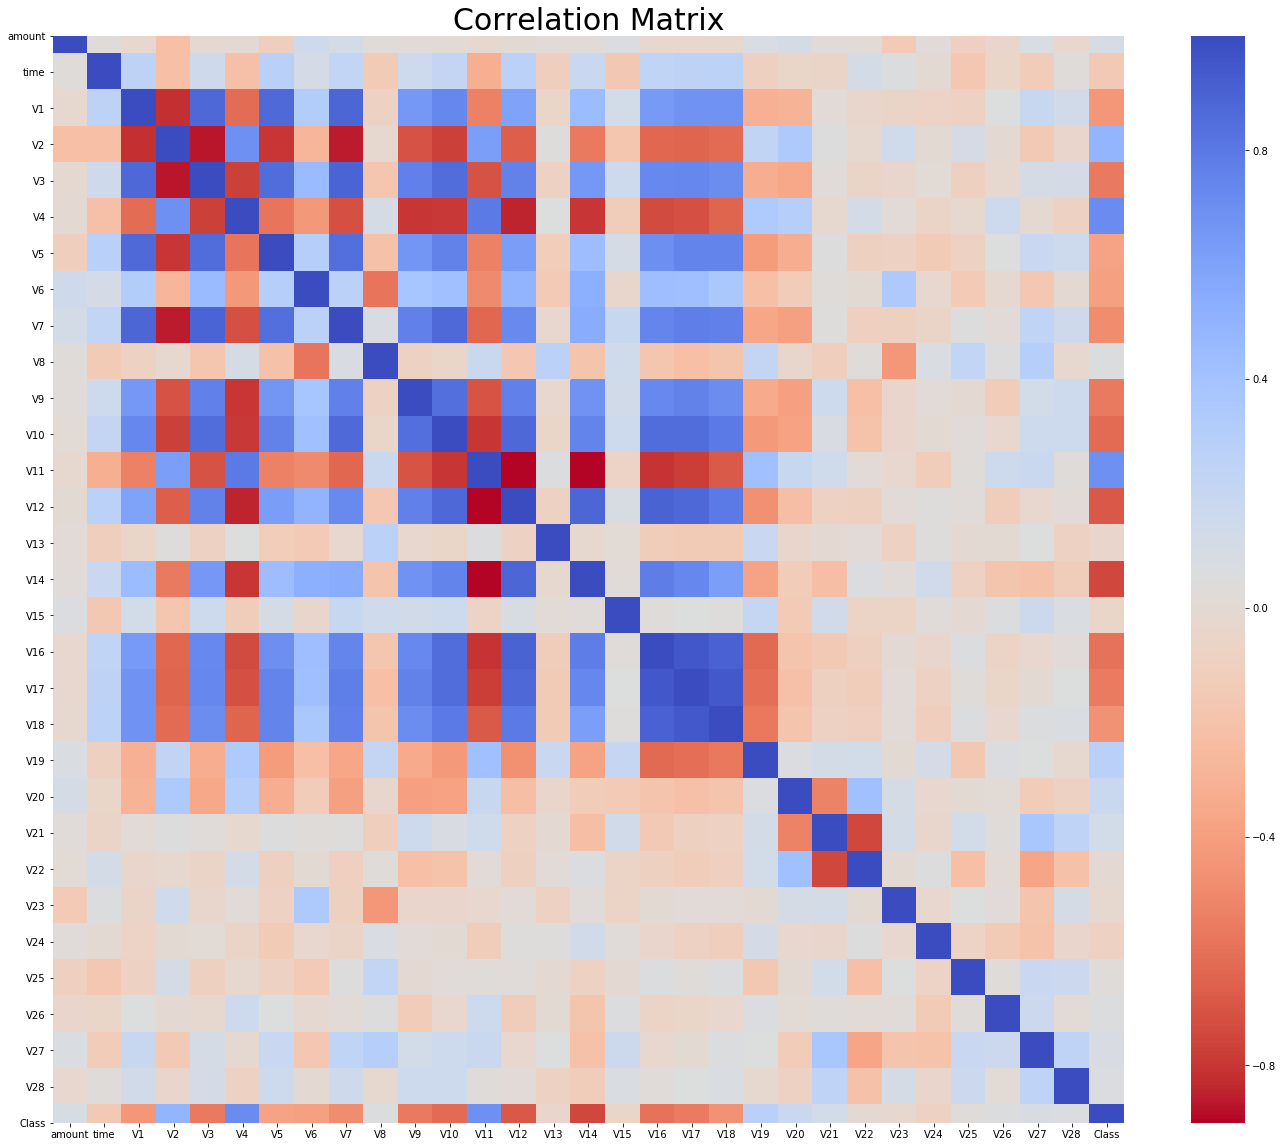

In [17]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

# the balanced dataframe

dump_corr = new_df.corr()
#sns.set(font_scale=1.8)
sns.heatmap(dump_corr, cmap='coolwarm_r', annot_kws={'size':20},ax=ax1)
ax1.set_title('Correlation Matrix', fontsize=30)

plt.show()

### Correlation using the entire data set

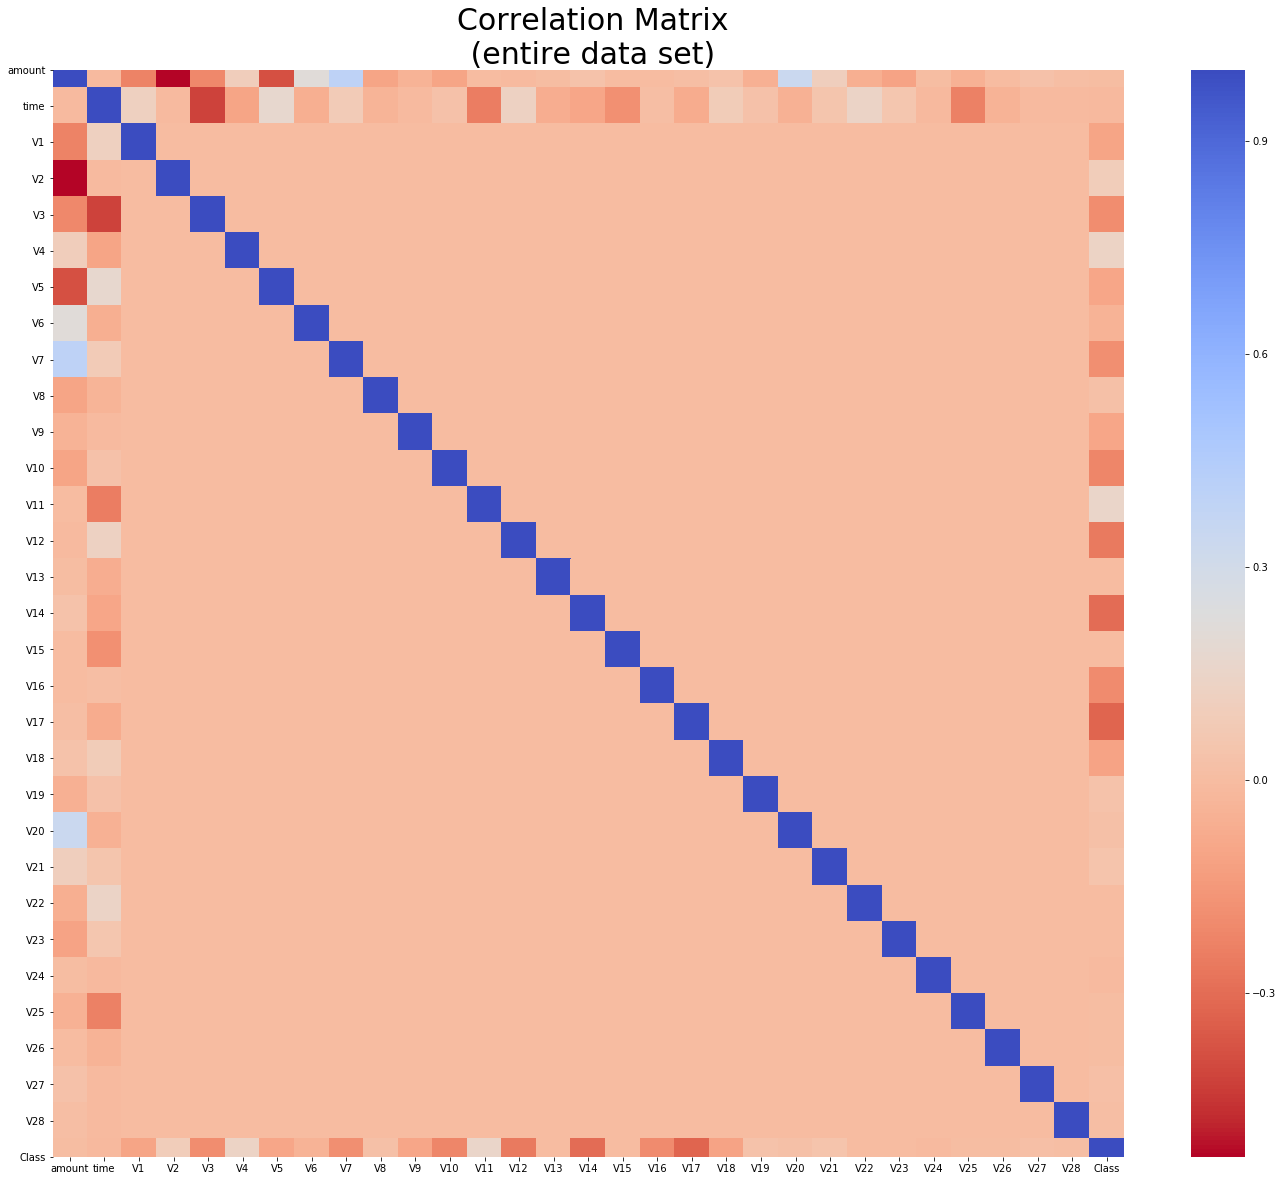

In [18]:
f, ax1c = plt.subplots(1, 1, figsize=(24,20))

# the balanced dataframe

dump_corr2 = df.corr()
#sns.set(font_scale=1.8)
sns.heatmap(dump_corr2, cmap='coolwarm_r', annot_kws={'size':20},ax=ax1c)
ax1c.set_title('  Correlation Matrix \n (entire data set)', fontsize=30)

plt.show()

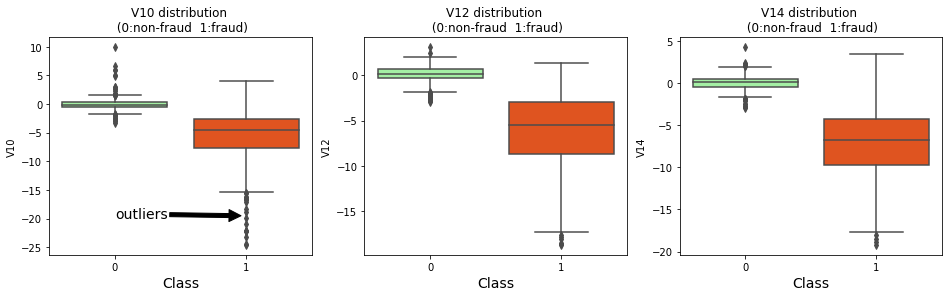

In [19]:
f, axes2 = plt.subplots(ncols=3, figsize=(16,4))

# Negative Correlations between features V10, V12, V14, V17, V14, V16, V17 and Class feature
# It appears when the fetaure values V10, V12, V14, V17 decreases, the higher the probability of a fraud transaction

colors = ["palegreen", "orangered"]

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes2[0])
axes2[0].set_title('V10 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes2[0].set_xlabel('Class', fontsize=14)
#axes2[0].set_ylabel('V10', fontsize=10)
axes2[0].annotate('outliers', xy=(0.96, -19.5), xytext=(0, -20),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes2[1])
axes2[1].set_title('V12 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes2[1].set_xlabel('Class', fontsize=14)
#axes2[1].set_ylabel('V12', fontsize=10)


sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes2[2])
axes2[2].set_title('V14 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes2[2].set_xlabel('Class', fontsize=14)
#axes2[2].set_ylabel('V14', fontsize=10)


plt.show()

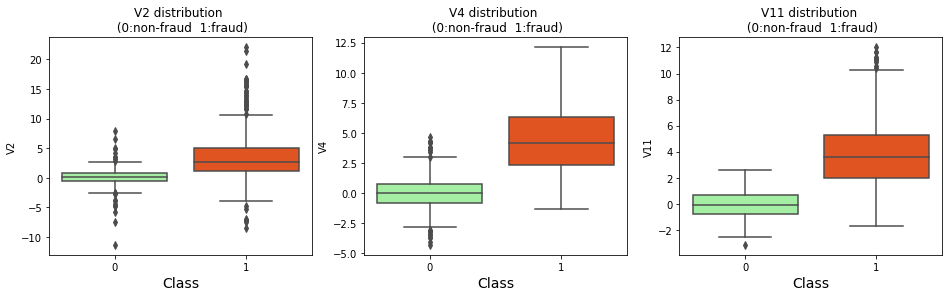

In [20]:
f, axes3 = plt.subplots(ncols=3, figsize=(16,4))

# Positive Correlations between features V2, V4, V11 and Class feature
# It appears that when the fetaure values V2, V4, V11 increases, the higher the probability of a fraud transcation


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes3[0])
axes3[0].set_title('V2 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes3[0].set_xlabel('Class', fontsize=14)

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes3[1])
axes3[1].set_title('V4 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes3[1].set_xlabel('Class', fontsize=14)


sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes3[2])
axes3[2].set_title('V11 distribution \n (0:non-fraud  1:fraud)', fontsize=12)
axes3[2].set_xlabel('Class', fontsize=14)

plt.show()

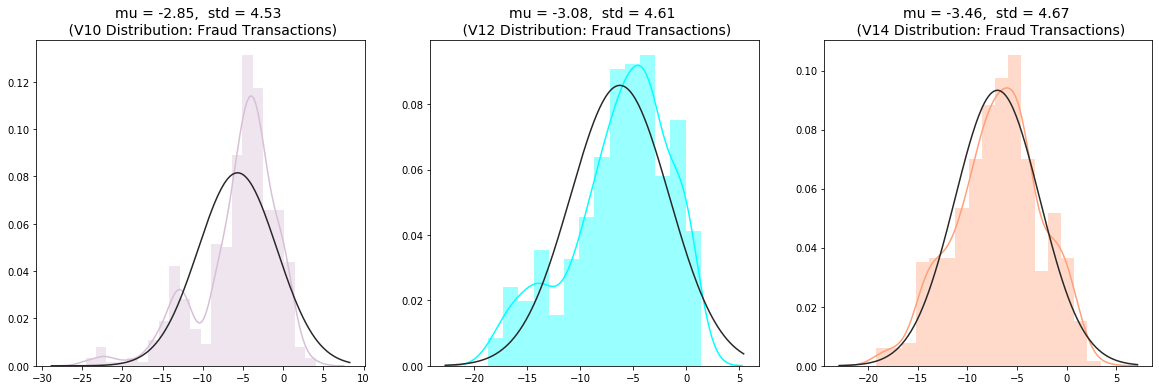

In [21]:
# for the variables with the negative correlations

mu10, std10 = norm.fit(new_df['V10'])
mu12, std12 = norm.fit(new_df['V12'])
mu14, std14 = norm.fit(new_df['V14'])

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax1, fit=norm, color='thistle')
ax1.set_title("mu = %.2f,  std = %.2f \n (V10 Distribution: Fraud Transactions)" % (mu10, std10), fontsize=14)
ax1.set_facecolor('white')

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='cyan')
ax2.set_title("mu = %.2f,  std = %.2f \n (V12 Distribution: Fraud Transactions)" % (mu12, std12), fontsize=14)
ax2.set_facecolor('white')


v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax3, fit=norm, color='lightsalmon')
ax3.set_title("mu = %.2f,  std = %.2f \n (V14 Distribution: Fraud Transactions)" % (mu14, std14), fontsize=14)
ax3.set_facecolor('white')

plt.show()

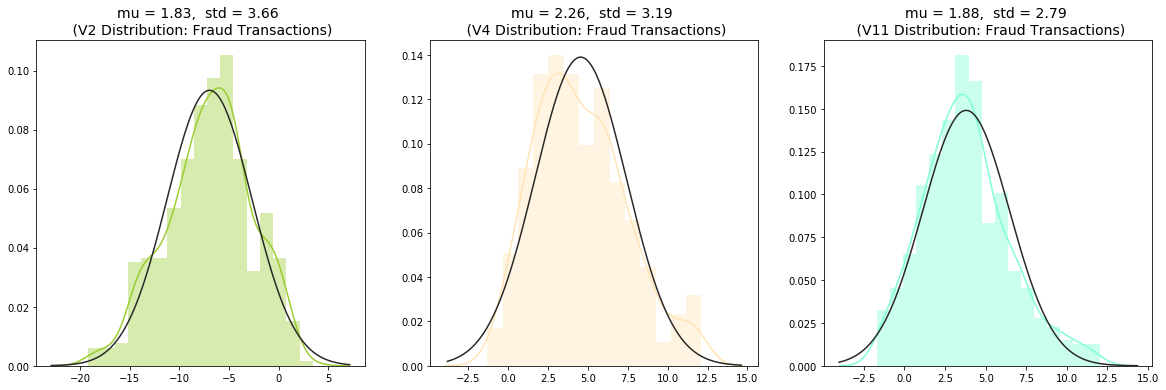

In [22]:
# for the variables with the positive correlations

mu2, std2 = norm.fit(new_df['V2'])
mu4, std4 = norm.fit(new_df['V4'])
mu11, std11 = norm.fit(new_df['V11'])

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='yellowgreen')
ax1.set_title("mu = %.2f,  std = %.2f \n (V2 Distribution: Fraud Transactions)" % (mu2, std2), fontsize=14)
ax1.set_facecolor('white')

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='moccasin')
ax2.set_title("mu = %.2f,  std = %.2f \n (V4 Distribution: Fraud Transactions)" % (mu4, std4), fontsize=14)
ax2.set_facecolor('white')


v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax3, fit=norm, color='aquamarine')
ax3.set_title("mu = %.2f,  std = %.2f \n (V11 Distribution: Fraud Transactions)" % (mu11, std11), fontsize=14)
ax3.set_facecolor('white')


plt.show()

### Dimensionality Reduction using t-SNE

In [23]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

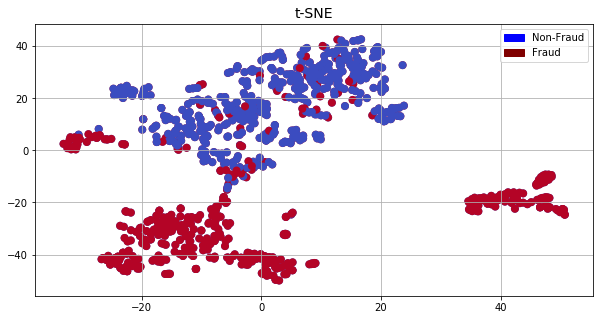

In [24]:
f, ax1 = plt.subplots(1, 1, figsize=(10,5))

blue_patch = mpatches.Patch(color='blue', label='Non-Fraud')
red_patch = mpatches.Patch(color='maroon', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

### Logistic Regression

In [25]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import warnings
warnings.filterwarnings("ignore")

# implementing the classifier
classifiers = {"LogisiticRegression": LogisticRegression()}

# aplying cross validation will increase the score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy")

LogisticRegression Has a training score of 94.0 % accuracy
